In [1]:
import spacy

In [ ]:
# pipeline: blank pipeline: default:-- tokenizer.

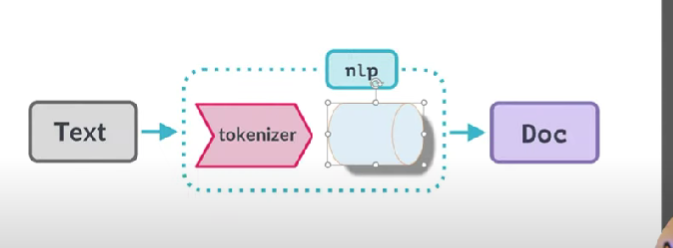

In [3]:
#creating a blank language processing pipeline.
# although the pipeline is blank, we get tokenizer by default.
nlp = spacy.blank("en")
doc = nlp("Hi, I have taken $100")
for token in doc:
    print(token)

Hi
,
I
have
taken
$
100


In [4]:
nlp.pipe_names # just empty pipeline.

[]

### Using the pre-trained lanuguage processing pipelin

In [5]:
#let's load the pre-trained pipeline instead of blank english pipe.
nlp = spacy.load("en_core_web_sm")

In [9]:
nlp.pipe_names # different components of the pipeline.
# nlp.pipeline

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [12]:
text = "Captain America ate 100 $ of Samosa. Then he said I can do this all day."
doc = nlp(text)
for token in doc:
    print(token, " | ", token.pos_, " | ", token.lemma_)
# .pos_ --> parts of speech
# .lemma_ --> root word 

Captain  |  PROPN  |  Captain
America  |  PROPN  |  America
ate  |  VERB  |  eat
100  |  NUM  |  100
$  |  SYM  |  $
of  |  ADP  |  of
Samosa  |  PROPN  |  Samosa
.  |  PUNCT  |  .
Then  |  ADV  |  then
he  |  PRON  |  he
said  |  VERB  |  say
I  |  PRON  |  I
can  |  AUX  |  can
do  |  VERB  |  do
this  |  PRON  |  this
all  |  DET  |  all
day  |  NOUN  |  day
.  |  PUNCT  |  .


 ### Named entity recognition: [ner]

In [25]:
# getting the entities and its explanation using the trained pipeline.
doc = nlp("Tesla Inc is going to acquire Twitter for $34 billion")
for entity in doc.ents:
    print(entity, " | ", entity.label_, " ", spacy.explain(entity.label_))

Tesla Inc  |  ORG   Companies, agencies, institutions, etc.
Twitter  |  PRODUCT   Objects, vehicles, foods, etc. (not services)
$34 billion  |  MONEY   Monetary values, including unit


In [29]:
# visually displaying in better way.
from spacy import displacy
displacy.render(doc, style = "ent")

### Now we don't want all the pipeline components: 

```['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'] ```

#### we will create our own custom pipelines 

In [32]:
source_nlp = spacy.load("en_core_web_sm")
nlp = spacy.blank("en")
nlp.add_pipe("ner", source = source_nlp) # taking the 'ner' component from trained_pipeline.
nlp.pipe_names

['ner']

#### taking only the ner- named entity recognition component

In [35]:
doc = nlp("Tesla Inc is going to acquire Twitter for $34 billion")
for ent in doc.ents:
    print(ent.text, " | ", ent.label_)

Tesla Inc  |  ORG
Twitter  |  PRODUCT
$34 billion  |  MONEY
